In [4]:
import cv2
import numpy as np
from plt_utils import plt_imgshow

In [6]:
img = cv2.imread('../images/5_of_diamonds.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [25]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

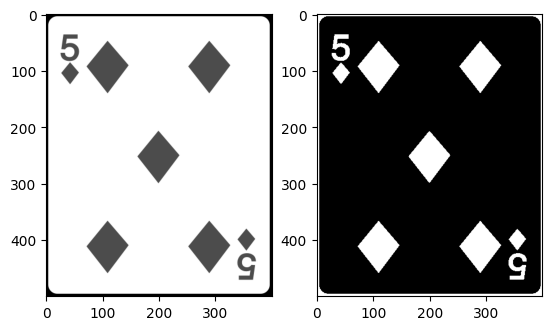

In [26]:
plt_imgshow([gray, thresh], columns=2)

In [29]:
# Remove noise.
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel=kernel, iterations=2)

# Find the sure background region.
sure_bg = cv2.dilate(opening, kernel=kernel, iterations=3)

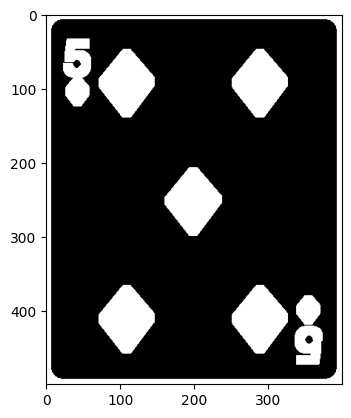

In [32]:
plt_imgshow(sure_bg)

In [33]:
# Find the sure foreground region.
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8)

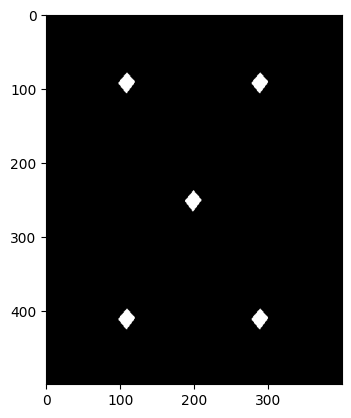

In [34]:
plt_imgshow(sure_fg)

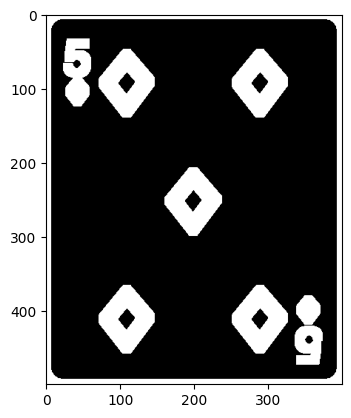

In [35]:
# Find the unknown region.
unknown = cv2. subtract (sure_bg, sure_fg)
plt_imgshow(unknown)

In [41]:
# Label the foreground objects.
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1.
markers += 1

# Label the unknown region as 0.
markers[unknown==255] = 0

In [42]:
markers = cv2.watershed (img, markers)
img[markers==-1] = [255,0,0]

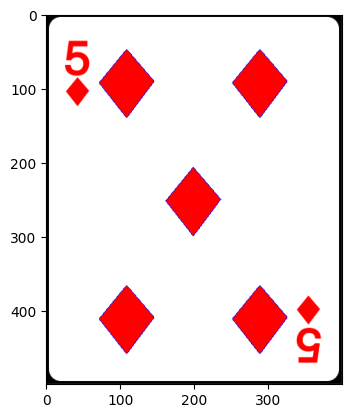

In [43]:
plt_imgshow(img)